In [1]:
import re
import csv
import numpy as np
import scipy
import pandas as pd
import json
import math
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from nltk.util import ngrams
from collections import Counter
#from similarity import *

# import visualizations here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

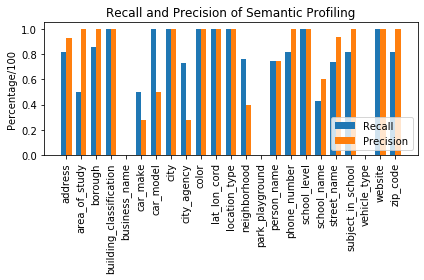

In [34]:
#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels = ['address', 'area_of_study', 'borough', 'building_classification' ,'business_name', 'car_make', 'car_model',
'city',
'city_agency',
'color','lat_lon_cord',
'location_type',
'neighborhood',
'park_playground',
'person_name',
'phone_number',
'school_level',
'school_name',
'street_name',
'subject_in_school',
'vehicle_type',
'website',
'zip_code',]

#men_means = [20, 34, 30, 35, 27]
recall = [0.8125,
0.5,
0.857142857142857,
1,
0,
0.5,
1,
1,
0.727272727272727,
1,
1,
1,
0.764705882352941,
0,
0.741935483870968,
0.818181818181818,
1,
0.428571428571429,
0.736842105263158,
0.8125,
0,
1,
0.818181818181818]

#women_means = [25, 32, 34, 20, 25]
precision = [0.928571428571429
,1
,1
,1
,0
,0.277777777777778
,0.5
,1
,0.275862068965517
,1
,1
,1
,0.393939393939394
,0
,0.741935483870968
,1
,1
,0.6
,0.933333333333333
,1
,0
,1
,1
]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, recall, width, label='Recall')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage/100')
ax.set_title('Recall and Precision of Semantic Profiling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

#def autolabel(rects):
 #   """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
##        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
plt.legend(loc = 'lower right')
#plt.legend(bbox_to_anchor=(0, 1), loc='lower right', ncol=1)
fig.tight_layout()

plt.show()

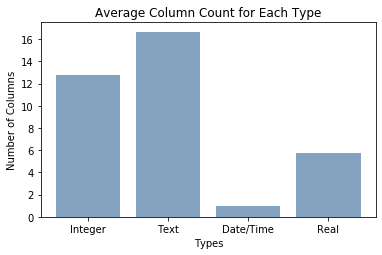

In [5]:


x = np.arange(4)
vals = [12.80, 16.67, 0.96, 5.71]


#def millions(x, pos):
##    'The two args are the value and tick position'
 #   return '$%1.1fM' % (x * 1e-6)


#formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.8)
plt.bar(x, vals, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x, ('Integer', 'Text', 'Date/Time', 'Real'))
ax.set_ylabel('Number of Columns')
ax.set_xlabel('Types')
ax.set_title('Average Column Count for Each Type')
plt.show()


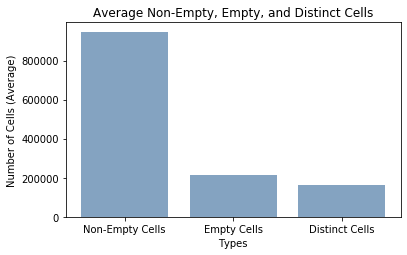

In [11]:
x = np.arange(3)
vals = [947715.4, 212337.6, 164253.8]

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.8)
plt.bar(x, vals, color= (0.2, 0.4, 0.6, 0.6))
plt.xticks(x, ('Non-Empty Cells', 'Empty Cells', 'Distinct Cells'))
ax.set_ylabel('Number of Cells (Average)')
ax.set_xlabel('Types')
ax.set_title('Average Non-Empty, Empty, and Distinct Cells')
plt.show()


In [19]:
money

[12.8, 16.67, 0.96, 5.71]

In [12]:


# set ngrams here
NGRAMS = 3


# note: cosine similarity function is from:
# https://gist.github.com/gaulinmp/da5825de975ed0ea6a24186434c24fe4
def cosine_similarity_ngrams(a, b):
    vec1 = Counter(a)
    vec2 = Counter(b)
    
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    return float(numerator) / denominator

def compute_jaccard_similarity(s1, s2):
    numerator = len(set(s1).intersection(set(s2)))
    denominator = len(set(s1).union(set(s2)))
    if denominator is 0:
        return(0.0)
    return(numerator/denominator)

def write_to_json(cluster_id_dic):
    with open('../../resources/filename_clusters.json', 'w') as fp:
        json.dump(cluster_id_dic, fp, sort_keys=True, indent=4)

def write_list_to_txt(file_list):
    with open('../../resources/filelist_axis_sim_matrix', 'w') as f:
        wr = csv.writer(f, quoting=csv.QUOTE_ALL)
        wr.writerow(file_list)

def write_matrix_to_csv(M):
    np.savetxt('../../resources/filename_similarity_matrix.csv', M, delimiter=',')

def clean_string(s):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    return(s)

def get_ngram_list_from_string(s):
    clean_s = clean_string(s)
    tokens = [token for token in s]
    output = list(ngrams(tokens, NGRAMS)) 
    return(output)

if __name__ == "__main__":

    filelist = "../cluster3.txt"
    
    with open(filelist, 'r') as f:
        raw_list = f.read().split(",")

    raw_list = raw_list = [re.sub("\[|\]|\'|\'|" "", "", item)for item in raw_list]
    raw_list = [re.sub(" " "", "", item)for item in raw_list] 
    
    raw_list = list(set(raw_list)) # remove duplicate filenames 
   
    clean_list = [x.split(".")[1] for x in raw_list] 
    clean_list = [re.sub("_", "", item)for item in raw_list] 


    # Use this small sample set for sanity check
    #test_list = ["hello", "hi", "cool", "school"]
    #axis_len = len(test_list)
    
    axis_len = len(clean_list)
    M = np.empty((axis_len, axis_len)) # init an empty matrix 
        
    for i, name_x in enumerate(clean_list):
        for j, name_y in enumerate(clean_list):
            a = get_ngram_list_from_string(name_x)
            b = get_ngram_list_from_string(name_y)

            #M[i][j] = compute_jaccard_similarity(a, b)
            M[i][j] = cosine_similarity_ngrams(a, b)


    linkage_matrix = scipy.cluster.hierarchy.linkage(M, 'single')
    fcluster = fcluster(linkage_matrix, t=0.9)

    cluster_id_dic = {str(x): [] for x in fcluster}

    df = pd.DataFrame()
    df['filename'] = raw_list
    df['cluster_id'] = fcluster
  

    for index, row in df.iterrows():
        cluster_id_dic[str(row['cluster_id'])].append(row['filename'])
    
    for index, row in df.iterrows():
        cluster_id_dic[str(row['cluster_id'])].append(row['filename'])
        

    
    # write cluster dic to json
    write_to_json(cluster_id_dic)

    # write similarity matrix to csv
    write_matrix_to_csv(M)

    # write file list to text file (the list represents the axes of the sim matrix)
    write_list_to_txt(clean_list)




In [157]:
# map cluster_ids to linkage matrix indices
#df['x'] = linkage_matrix[:,0]
#df['y'] = linkage_matrix[:,1]
#len(linkage_matrix[:,0])
#len(fcluster)
len(linkage_matrix)
#len(linkage_matrix[:,1])
#raw_list[len(raw_list)-1]
#linkage_matrix[len(linkage_matrix)-1]
#fcluster[len(fcluster)-1]
#fcluster[0]
#fcluster  = fcluster[:-1]
#len(fcluster)

262

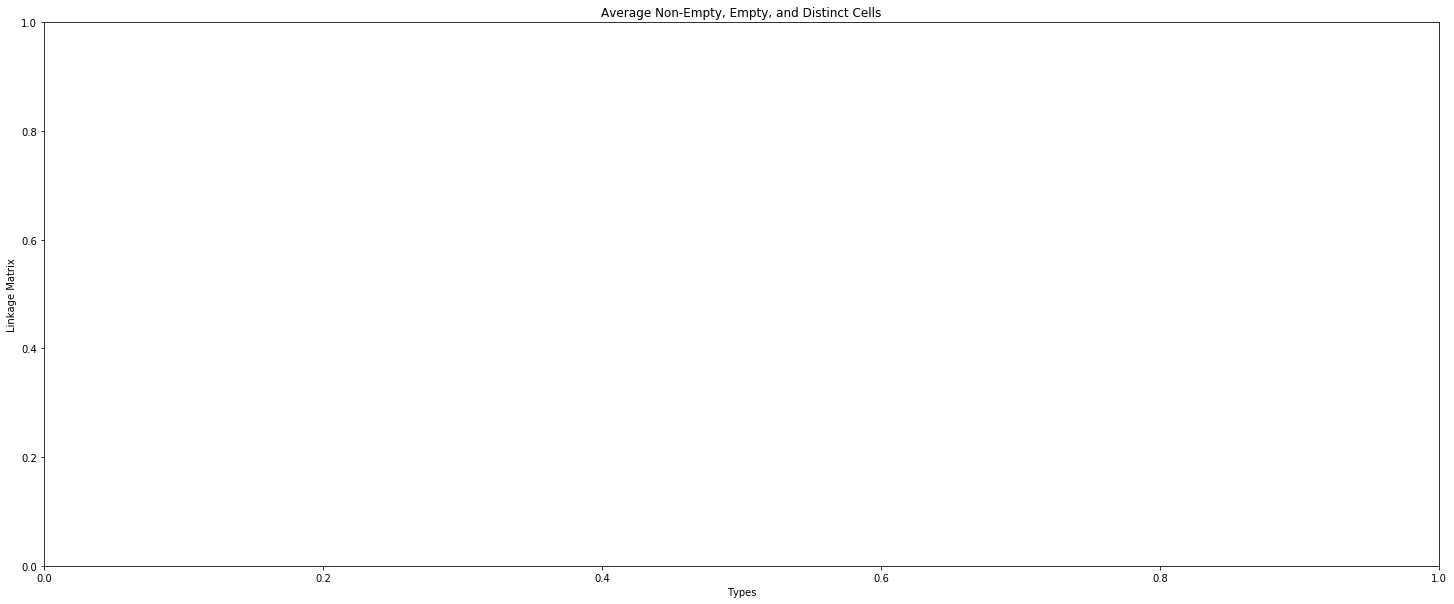

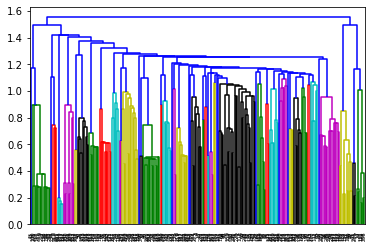

In [15]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_ylabel('Linkage Matrix')
ax.set_xlabel('Types')
ax.set_title('Average Non-Empty, Empty, and Distinct Cells')
plt.show()

dn = dendrogram(linkage_matrix)


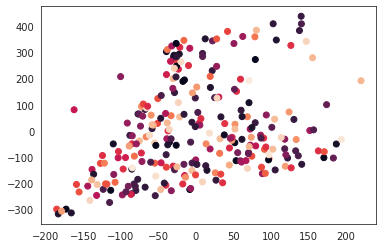

In [158]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_r = mds.fit(linkage_matrix).embedding_  

plt.scatter(X_r[:,0],X_r[:,1],c=fcluster)

                                              filename  cluster_id
0              ic3t-wcy2.Applicant_s_First_Name.txt.gz          38
1    jcih-dj9q.QUEENS_____CONDOMINIUMS_COMPARABLE_P...          62
2    s3zn-tf7c.QUEENS_CONDOMINIUM_PROPERTY_Building...          64
3                                easq-ubfe.CITY.txt.gz          50
4                            6anw-twe4.LastName.txt.gz          37
..                                                 ...         ...
258                            7jkp-5w5g.Agency.txt.gz          11
259                          pqg4-dm6b.Address1.txt.gz          14
260                     yayv-apxh.SCHOOL_LEVEL_.txt.gz          16
261                            i5ef-jxv3.Agency.txt.gz          11
262                    mdcw-n682.Middle_Initial.txt.gz          61

[263 rows x 2 columns]


In [90]:
fcluster


array([38, 62, 64, 50, 37, 10, 24, 11, 59, 64, 41, 43, 13,  9, 14,  6,  2,
       50, 27, 10, 37,  3, 41, 28, 33,  9, 41, 14, 13, 10, 21, 38,  2,  7,
       26, 38, 38,  2, 63, 10,  2, 29, 42, 38, 54, 45,  7, 23, 38, 41, 11,
       52, 25, 58, 65, 28, 63, 41, 32, 37, 47, 14, 51, 63,  9, 65, 52, 26,
       14, 18,  2, 55, 26, 59, 35,  8, 44,  7, 45, 36,  7, 21, 37, 42, 65,
       59, 43, 59,  7, 11,  2, 31, 14, 10, 48, 14,  2, 54, 42,  4, 41, 30,
       22, 56, 35, 36,  9, 49, 14, 46, 35, 12, 26,  6, 28, 58, 28, 32, 43,
       45, 39, 54, 54, 20, 11, 38, 54,  5, 11, 14,  8, 59, 26,  9, 58, 52,
       48, 59, 11, 38, 28, 26,  9, 26, 35, 38, 26, 14,  9, 15, 24, 58, 25,
        7,  1, 67, 14, 30,  2, 38, 23, 11, 14, 63, 59, 63, 50, 38, 24, 41,
       63, 16, 17,  2, 13, 34, 18, 10,  6, 17,  6, 60, 14,  7, 37, 66,  2,
       38, 49, 44,  5, 12, 18,  1, 64, 40, 57, 24, 38, 59, 10, 52, 24, 14,
        5, 34,  6, 38, 24, 63, 10, 38, 27,  5, 54, 15, 14,  9, 62, 53, 33,
       37, 48, 43,  5, 28

In [29]:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# calculate the cophenet correlation coefficient (distance between linkage matrix and similarity matrix M)
# the closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(linkage_matrix, pdist(M))
c

0.7741540403114371

In [50]:
# each row of the resulting array has the format [idx1, idx2, dist, sample_count].
linkage_matrix[0]

array([1.13000000e+02, 1.78000000e+02, 1.50873282e-01, 2.00000000e+00])

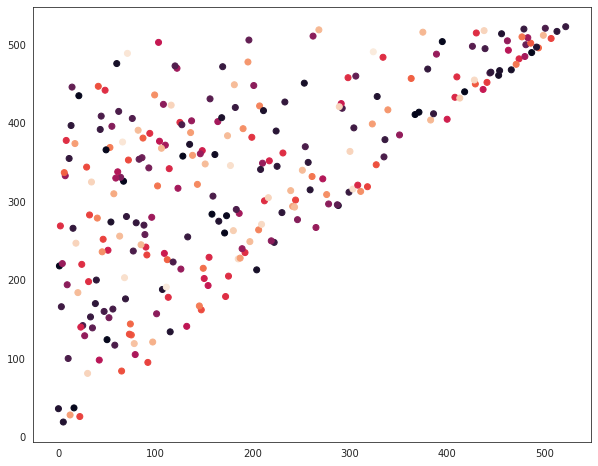

In [159]:
#idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(linkage_matrix[:,0], linkage_matrix[:,1], c=fcluster)  # plot all points
#plt.scatter(linkage_matrix[idxs,0], linkage_matrix[idxs,1], c='r')  # plot interesting points in red again
plt.show()

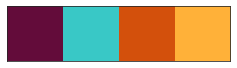

In [39]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

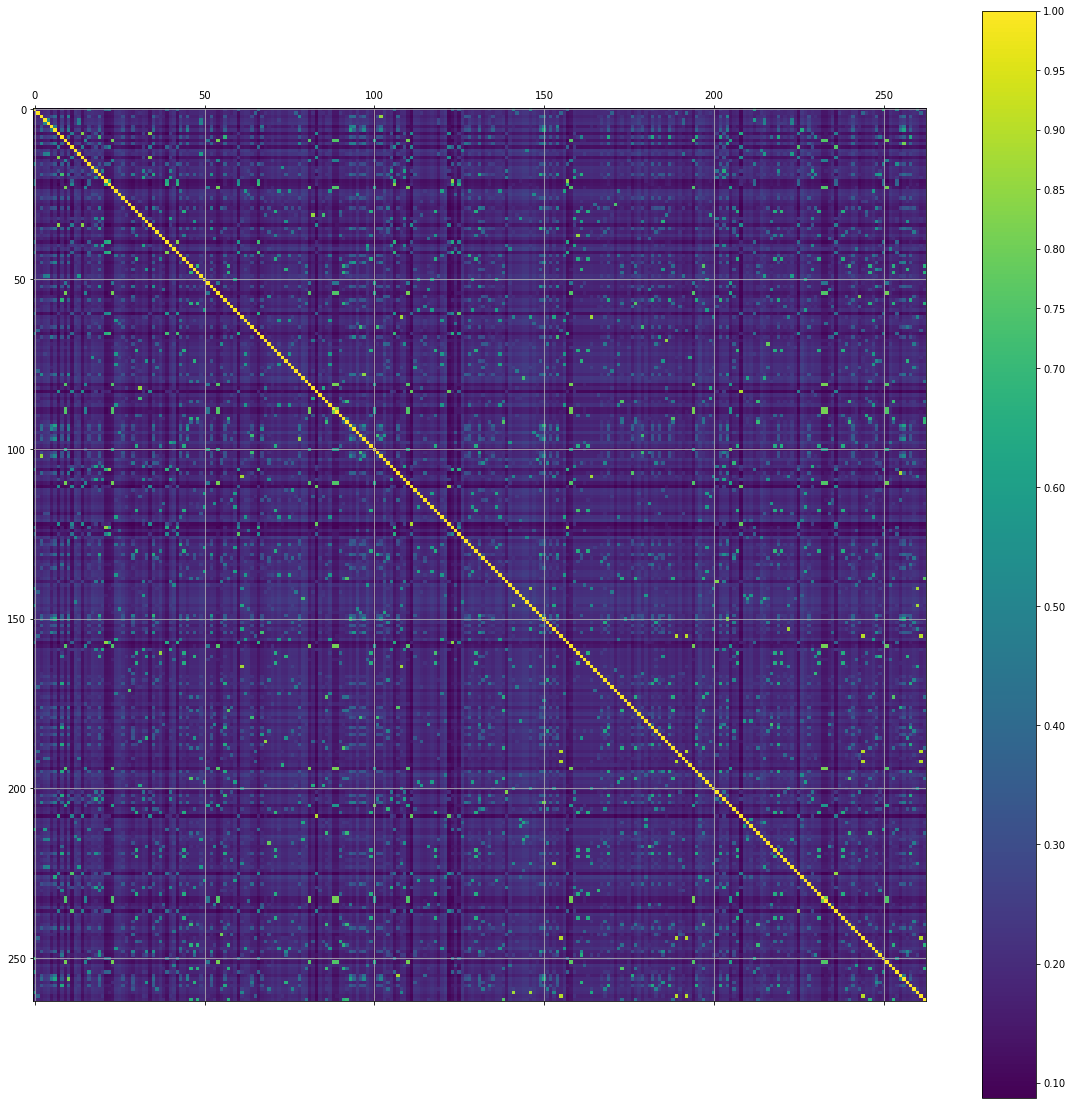

In [19]:
# similarity matrix heatmap
#labels = raw_list

#labels = []
#for hood in hood_menu_data:
    #labels.append(hood["properties"]['NAME'])

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(M, interpolation='nearest')
ax.grid(True)
#plt.xticks(range(33), labels, rotation=90);
#plt.yticks(range(33), labels);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()